# TLG Financial Statement Analysis 2019 and 2020

# Import Libraries and Data Set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
TLGData = pd.read_excel("BI5_Data_Round1.xlsx", sheet_name=None)

In [3]:
TLGarray = TLGData.pop('Data')

In [4]:
TLGdataframe = pd.DataFrame(TLGarray)

In [5]:
TLGdataframe.head()

,Kỳ,Mã sản phẩm,Tên sản phẩm,Nhóm SP - Cấp 1,Tên Nhóm SP - Cấp 1,Nhóm SP - Cấp 2,Tên Nhóm SP - Cấp 2,Nhóm SP - Cấp 3,Tên Nhóm SP - Cấp 3,Nhóm SP - Cấp 4,...,Kênh phân phối,Tên Kênh phân phối,Nhóm bán hàng,Tên Nhóm bán hàng,Vùng bán hàng,Tên Vùng bán hàng,Số lượng,Doanh thu,Giá vốn,Chi phí
0,1.202,50000008,Bút TL023 đen-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,20494.0,40988000.0,28691600.00,7295814.0
1,1.202,50000010,Bút TL023 đỏ-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,3088.0,6176000.0,4384960.00,1099321.0
2,1.202,50000015,Bút TL023 xanh-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,20530.0,41060000.0,29563200.00,7308630.0
3,1.202,50000025,Bút TL025 đen-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010003,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,1106.0,2614584.0,1908646.32,465393.0
4,1.202,50000027,Bút TL025 đỏ-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010003,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,309.0,730476.0,540552.24,130024.0


A quick description of the data using `info`method, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [6]:
TLGdataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90715 entries, 0 to 90714
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kỳ                   90715 non-null  float64
 1   Mã sản phẩm          90715 non-null  int64  
 2   Tên sản phẩm         90714 non-null  object 
 3   Nhóm SP - Cấp 1      90714 non-null  float64
 4   Tên Nhóm SP - Cấp 1  90714 non-null  object 
 5   Nhóm SP - Cấp 2      90715 non-null  int64  
 6   Tên Nhóm SP - Cấp 2  90714 non-null  object 
 7   Nhóm SP - Cấp 3      90715 non-null  int64  
 8   Tên Nhóm SP - Cấp 3  90710 non-null  object 
 9   Nhóm SP - Cấp 4      90715 non-null  int64  
 10  Tên Nhóm SP - Cấp 4  90713 non-null  object 
 11  Kênh phân phối       90715 non-null  int64  
 12  Tên Kênh phân phối   90711 non-null  object 
 13  Nhóm bán hàng        90714 non-null  float64
 14  Tên Nhóm bán hàng    90714 non-null  object 
 15  Vùng bán hàng        90715 non-null 

The column names are in Vietnamese, so I decided to change it to English and make the paper much more understandable

In [7]:
TLGdataframe.columns = ['Period', 'Product ID','Product Name','Product Group - Level 1', 'Product Group Name - Level 1','Product Group - Level 2', 'Product Group Name - Level 2','Product Group - Level 3', 'Product Group Name - Level 3','Product Group - Level 4', 'Product Group Name - Level 4', 'Distribution', 'Distribution Name', 'Sale', 'Sale Name', 'Region', 'Region Name', 'Number of Product', 'Revenue', 'Cost price', 'Expenses'] 

In [8]:
TLGdataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90715 entries, 0 to 90714
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Period                        90715 non-null  float64
 1   Product ID                    90715 non-null  int64  
 2   Product Name                  90714 non-null  object 
 3   Product Group - Level 1       90714 non-null  float64
 4   Product Group Name - Level 1  90714 non-null  object 
 5   Product Group - Level 2       90715 non-null  int64  
 6   Product Group Name - Level 2  90714 non-null  object 
 7   Product Group - Level 3       90715 non-null  int64  
 8   Product Group Name - Level 3  90710 non-null  object 
 9   Product Group - Level 4       90715 non-null  int64  
 10  Product Group Name - Level 4  90713 non-null  object 
 11  Distribution                  90715 non-null  int64  
 12  Distribution Name             90711 non-null  object 
 13  S

# Adding new variables

In [9]:
TLGdataframe['Price'] = TLGdataframe['Revenue']/TLGdataframe['Number of Product']

In [10]:
TLGdataframe['Profit'] = TLGdataframe['Revenue'] - TLGdataframe['Cost price'] - TLGdataframe['Expenses']

In [47]:
TLGdataframe['PercentageProfit'] = TLGdataframe['Profit']/TLGdataframe['Revenue']*100

In [11]:
def Profit_Loss (row):
    if row['Profit'] > 0:
        return 'Profit'
    return 'Loss'
TLGdataframe['Profit_Loss'] = TLGdataframe.apply (lambda row: Profit_Loss(row), axis=1)

After adding new variables, we takes a quick look at our data frame again

In [49]:
TLGdataframe.head()

,Period,Product ID,Product Name,Product Group - Level 1,Product Group Name - Level 1,Product Group - Level 2,Product Group Name - Level 2,Product Group - Level 3,Product Group Name - Level 3,Product Group - Level 4,...,Region,Region Name,Number of Product,Revenue,Cost price,Expenses,Price,Profit,Profit_Loss,PercentageProfit
0,1.202,50000008,Bút TL023 đen-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,100013,MN1-Khu vực 2,20494.0,40988000.0,28691600.00,7295814.0,2000.0,5000586.00,Profit,12.200122
1,1.202,50000010,Bút TL023 đỏ-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,100013,MN1-Khu vực 2,3088.0,6176000.0,4384960.00,1099321.0,2000.0,691719.00,Profit,11.200113
2,1.202,50000015,Bút TL023 xanh-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,100013,MN1-Khu vực 2,20530.0,41060000.0,29563200.00,7308630.0,2000.0,4188170.00,Profit,10.200122
3,1.202,50000025,Bút TL025 đen-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010003,...,100013,MN1-Khu vực 2,1106.0,2614584.0,1908646.32,465393.0,2364.0,240544.68,Profit,9.200113
4,1.202,50000027,Bút TL025 đỏ-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010003,...,100013,MN1-Khu vực 2,309.0,730476.0,540552.24,130024.0,2364.0,59899.76,Profit,8.200100


# Descriptive Analytics and Diagnostic analytics

## Revenue and Profit distribution

In [14]:
MonthlyRevenue = TLGdataframe.groupby(['Period'])\
.agg(MonthlyRevenue = ('Revenue', sum)).reset_index()

In [15]:
MonthlyRevenue.sort_values('MonthlyRevenue')

,Period,MonthlyRevenue
3,2.2021,5.311576e+10
6,4.2019,5.389238e+10
22,12.2019,5.709030e+10
18,10.2019,5.719632e+10
0,1.2020,6.291771e+10
8,5.2019,6.830032e+10
7,4.2020,7.068263e+10
2,2.2020,7.171520e+10
23,12.2020,7.455951e+10
21,11.2020,7.475967e+10


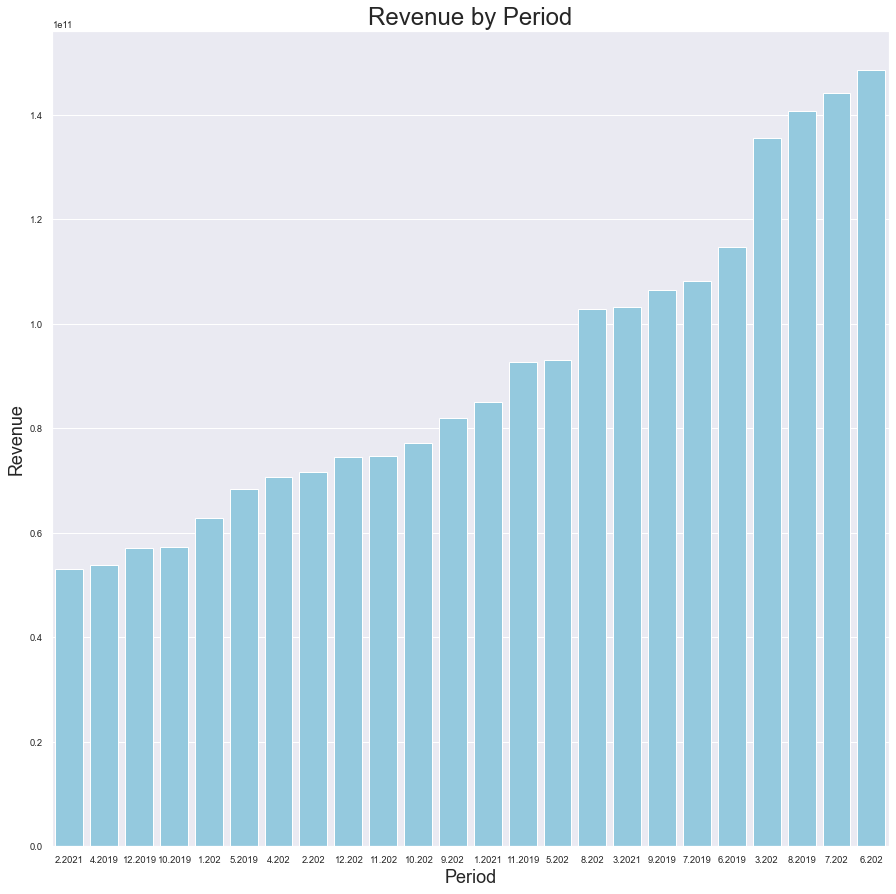

In [24]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale = 0.85)
sns.barplot(x='Period',
            y="MonthlyRevenue", 
            data=MonthlyRevenue, 
            order=MonthlyRevenue.sort_values('MonthlyRevenue').Period, color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Revenue by Period", fontsize=24)
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Revenue',fontsize=18)
plt.show()

In [17]:
MonthlyProfit = TLGdataframe.groupby(['Period'])\
.agg(MonthlyProfit = ('Profit', sum)).reset_index()

In [74]:
MonthlyProfit.sort_values('MonthlyProfit')

,Period,MonthlyProfit
3,2.2021,4.562300e+09
6,4.2019,4.613249e+09
21,11.2020,4.641034e+09
18,10.2019,4.926138e+09
22,12.2019,4.933902e+09
7,4.2020,5.149715e+09
2,2.2020,5.415117e+09
23,12.2020,5.430634e+09
0,1.2020,5.463040e+09
19,10.2020,5.845882e+09


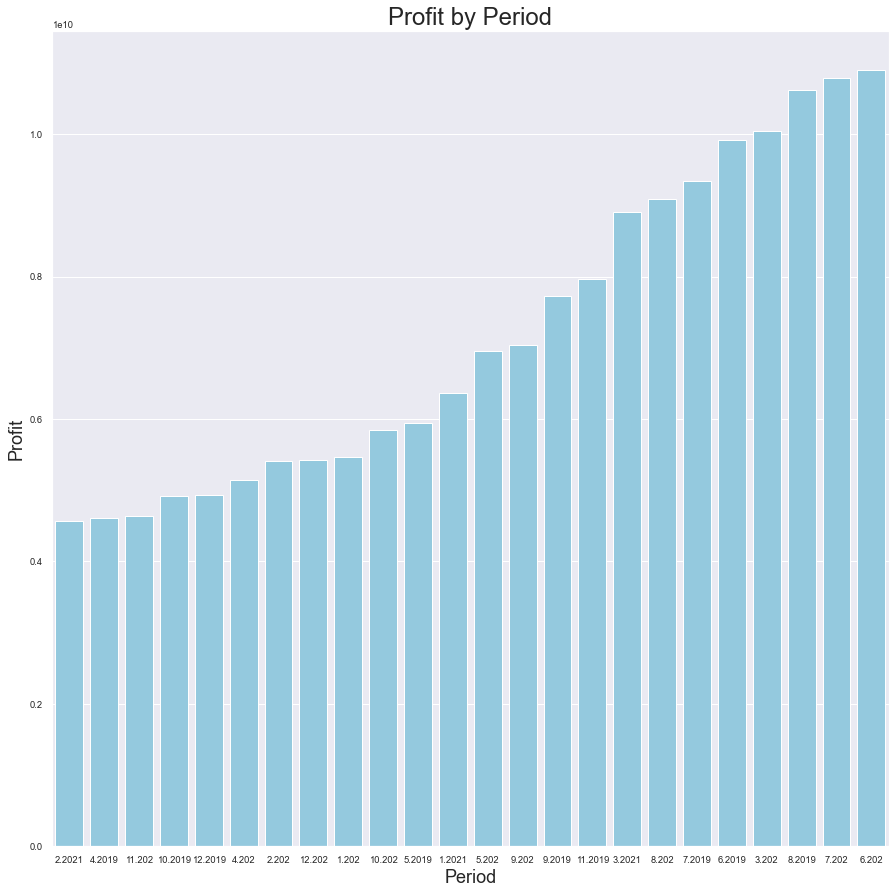

In [46]:
sns.barplot(x='Period',
            y="MonthlyProfit", 
            data=MonthlyProfit, 
            order=MonthlyProfit.sort_values('MonthlyProfit').Period, color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Profit by Period", fontsize=24)
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Profit',fontsize=18)
plt.show()

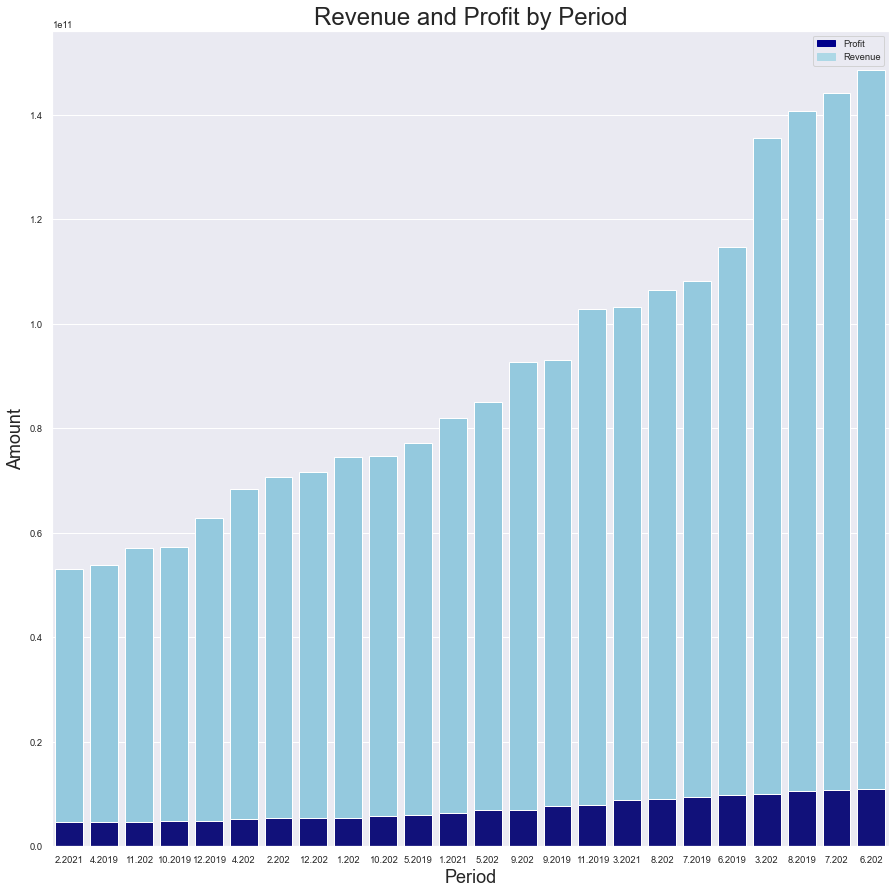

In [43]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale = 0.85)
sns.barplot(x='Period',
            y="MonthlyRevenue", 
            data=MonthlyRevenue, 
            order=MonthlyRevenue.sort_values('MonthlyRevenue').Period, color = 'skyblue')
sns.barplot(x='Period',
            y="MonthlyProfit", 
            data=MonthlyProfit, 
            order=MonthlyProfit.sort_values('MonthlyProfit').Period, color = 'darkblue')
plt.xticks(rotation=0)
plt.title("Revenue and Profit by Period", fontsize=24)
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Amount',fontsize=18)
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Revenue')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

In [69]:
RevenueProfit = pd.merge(MonthlyProfit,MonthlyRevenue)
RevenueProfit['MonthlyPercentageProfit'] = RevenueProfit['MonthlyProfit']/ RevenueProfit['MonthlyRevenue']*100 
RevenueProfit

,Period,MonthlyProfit,MonthlyRevenue,MonthlyPercentageProfit
0,1.2020,5.463040e+09,6.291771e+10,8.682833
1,1.2021,6.359192e+09,8.508887e+10,7.473588
2,2.2020,5.415117e+09,7.171520e+10,7.550864
3,2.2021,4.562300e+09,5.311576e+10,8.589353
4,3.2020,1.004341e+10,1.355122e+11,7.411443
5,3.2021,8.911177e+09,1.031427e+11,8.639658
6,4.2019,4.613249e+09,5.389238e+10,8.560114
7,4.2020,5.149715e+09,7.068263e+10,7.285686
8,5.2019,5.942715e+09,6.830032e+10,8.700859
9,5.2020,6.961442e+09,9.303412e+10,7.482676


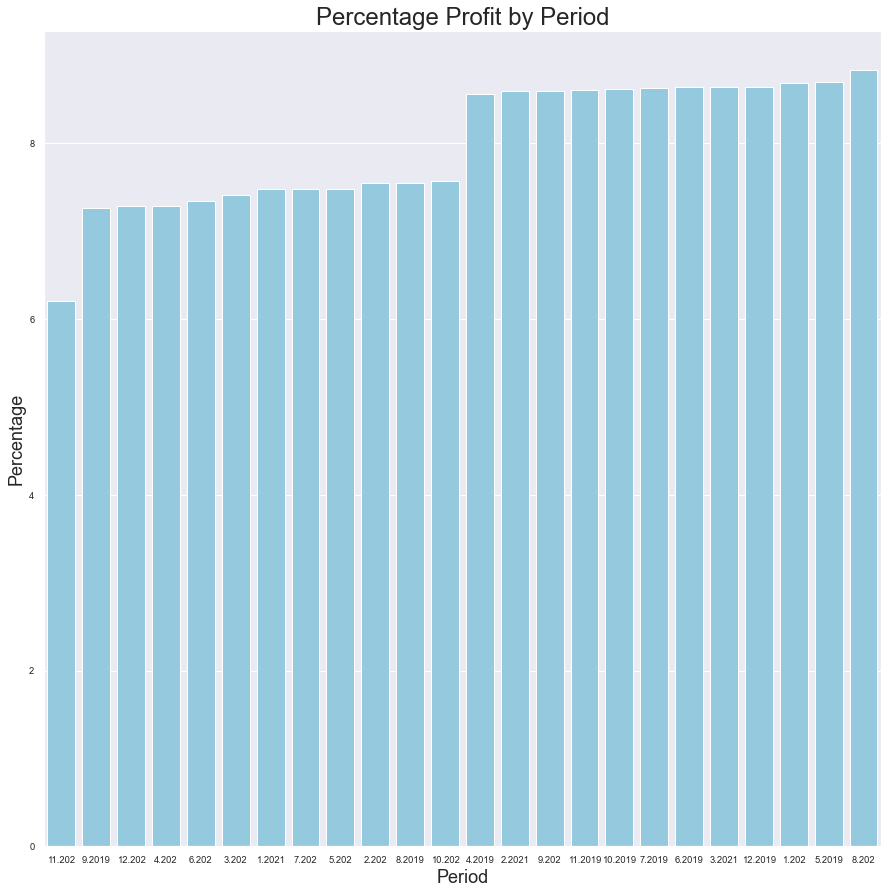

In [72]:
sns.barplot(x='Period',
            y="MonthlyPercentageProfit", 
            data=RevenueProfit, 
            order=RevenueProfit.sort_values('MonthlyPercentageProfit').Period, color = 'skyblue')
plt.title("Percentage Profit by Period", fontsize=24)
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Percentage',fontsize=18)
plt.show()

This is a bar chart represents the percentages profit each period. First of all, this is a bimodal distribution, which indicates two separated groups of period, with an exception of November, 2020. The two peak of two group are about 7.5% and 8.7%. We continue to investigate more closely, the first group which has a smaller percentage profit contains: (9/2019, 12/2020, 4/2020, 6/2020, 3/2020, 1/2021, 7/2020, 5/2020, 2/2020, 10/2020 and 8/2019). Wow, overall the first group contains almost every month in 2020, and contains both period which hold the highest revenue and the highest profit amount (6/2020, 7/2020). Using the only two graph of Revenue Amount and the Profit Amount, we do not recognize the disadvantages that Covid-19 brings to Thien Long Group, but, with the fact the the smaller group contains almost every months since the Covid-19 emerged and the lowest percentage hold by November, 2020, it is inevitable to admit the negative effect of Covid 19 brought to Thien Long Group.

## Distribution of Percentage Profit

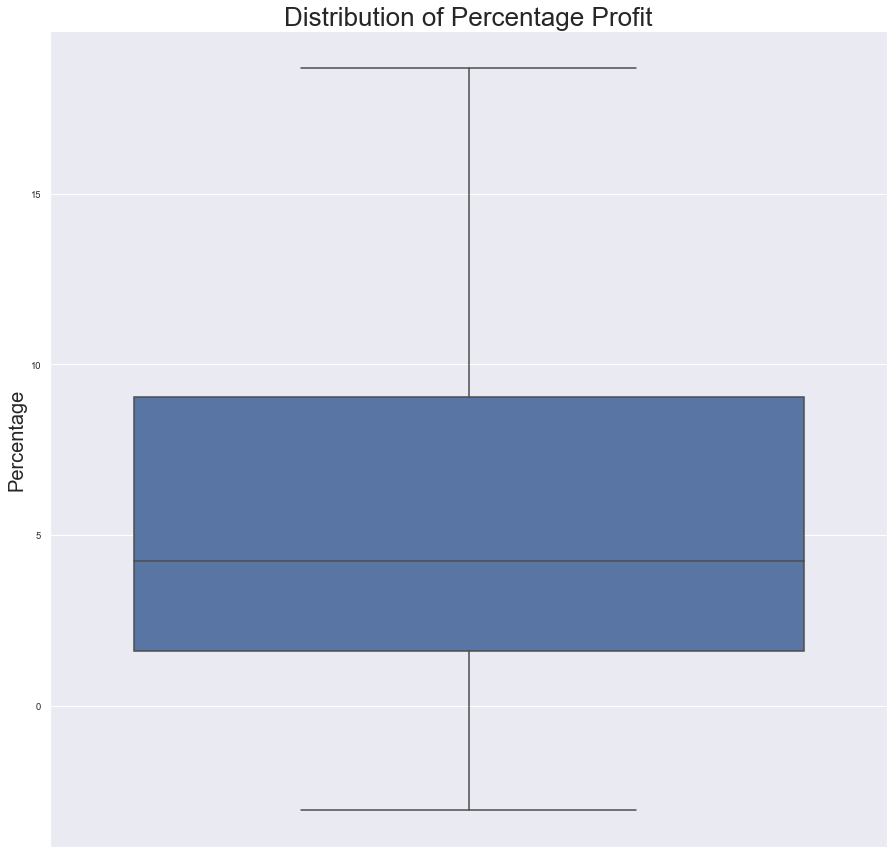

In [59]:
PercentageProfitPlot = sns.boxplot(y="PercentageProfit", data=TLGdataframe)
PercentageProfitPlot.set_ylabel("Percentage", fontsize=20)
PercentageProfitPlot.axes.set_title("Distribution of Percentage Profit", fontsize=26)
plt.show()

In [60]:
TLGdataframe['PercentageProfit'].max()

18.66411841728478

In [61]:
TLGdataframe['PercentageProfit'].min()

-3.0478111127116696

In [62]:
TLGdataframe['PercentageProfit'].max() - TLGdataframe['PercentageProfit'].min()

21.71192952999645

In [63]:
TLGdataframe['PercentageProfit'].mean()

5.511197304353693

In [65]:
TLGdataframe['PercentageProfit'].median()

4.247218611002404

In [66]:
TLGdataframe['Profit_Loss'].value_counts()

Profit    79535
Loss      11180
Name: Profit_Loss, dtype: int64

This is the box plot represents the percentage profit by each product launch. In general, this is a right-skewed distribution with a center focus around 4 to 5 percentage (median = 4.247218611002404), suggesting that Thien Long Group can expect a 4.5% profit when we launch a new product in a period. Of all 90715 lauching, Thien Long Group gets a 87.7% profitable lauching, which means they almost get profit in every product they sold. To elaborated on this matter, the profit in these periods peaks at 18.7%, while it reach the lowest points of -3.05%, which created the range of 21.7%. This is a pretty small range, proving that Thien Long Group's products are sustainable and since there are no outliers in the graph, Thien Long Group will not be likely to expect a rocket increase or a massive loss when they running a new product.

## Revenue and Profit by Product Group Level 1

First, we take a look at all the Product Group Level 1 Name

In [105]:
a = TLGdataframe['Product Group Name - Level 1'].value_counts()

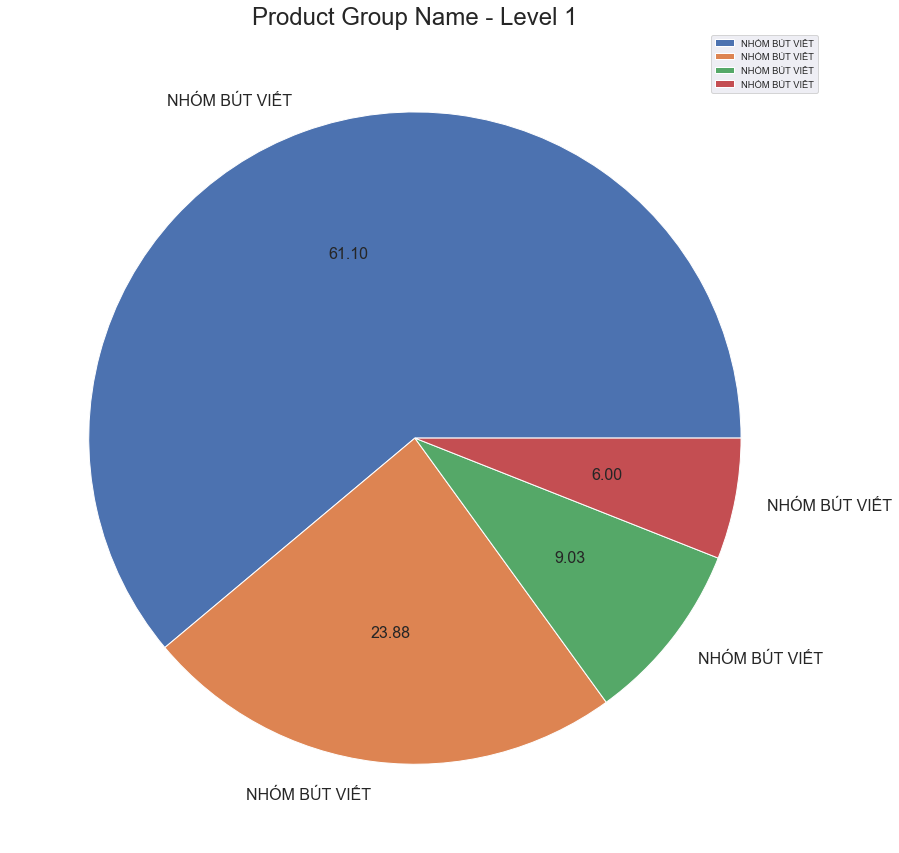

In [106]:
a.plot(kind = 'pie', autopct='%.2f', labels=TLGdataframe['Product Group Name - Level 1'],textprops={'fontsize': 16})
plt.title("Product Group Name - Level 1", fontsize=24)
plt.ylabel('')
plt.legend()
plt.show()

In [113]:
Group1Revenue = TLGdataframe.groupby(['Product Group Name - Level 1'])\
.agg(Group1Revenue = ('Revenue', sum)).reset_index()

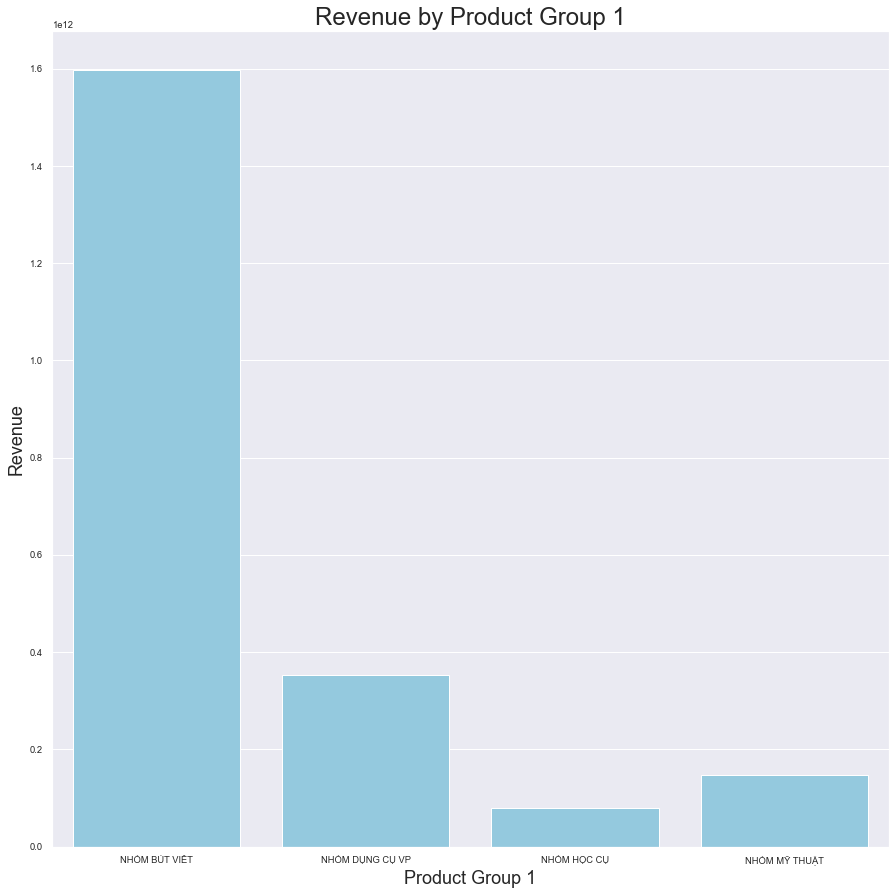

In [126]:
sns.barplot(x='Product Group Name - Level 1',
            y="Group1Revenue", 
            data=Group1Revenue, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Revenue by Product Group 1", fontsize=24)
plt.xlabel('Product Group 1',fontsize=18) 
plt.ylabel('Revenue',fontsize=18)
plt.show()

In [118]:
Group1Profit = TLGdataframe.groupby(['Product Group Name - Level 1'])\
.agg(Group1Profit = ('Profit', sum)).reset_index()

In [120]:
Group1Profit

,Product Group Name - Level 1,Group1Profit
0,NHÓM BÚT VIẾT,1.278689e+11
1,NHÓM DỤNG CỤ VP,2.652368e+10
2,NHÓM HỌC CỤ,6.145833e+09
3,NHÓM MỸ THUẬT,1.205274e+10


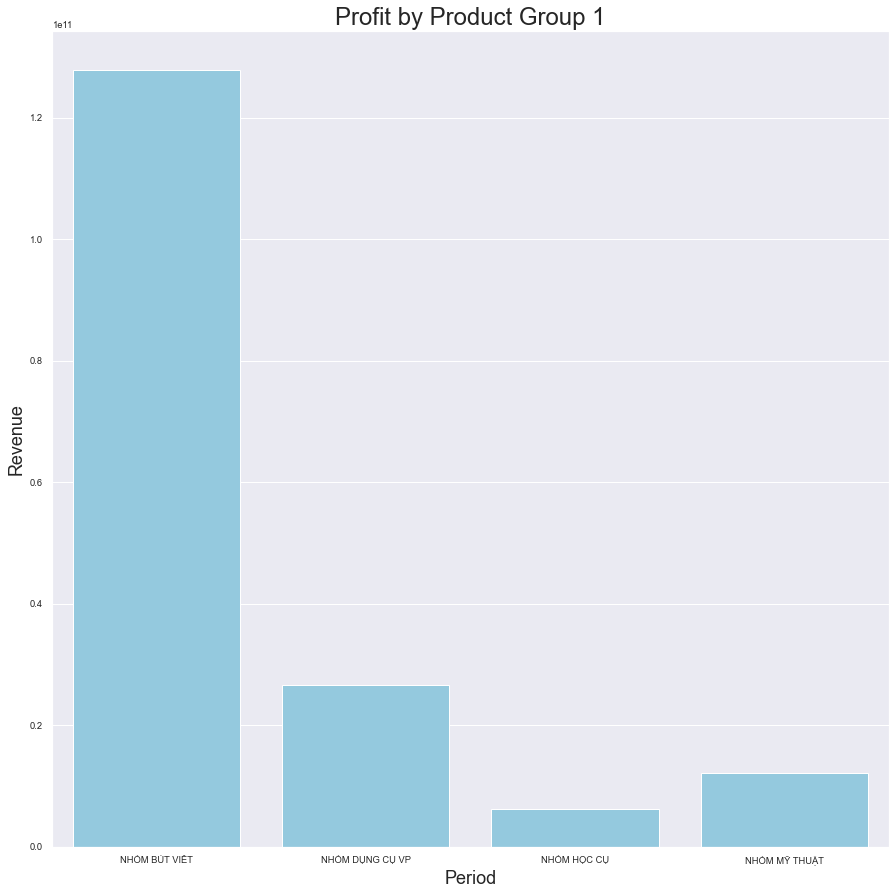

In [127]:
sns.barplot(x='Product Group Name - Level 1',
            y="Group1Profit", 
            data=Group1Profit, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Profit by Product Group 1", fontsize=24)
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Revenue',fontsize=18)
plt.show()

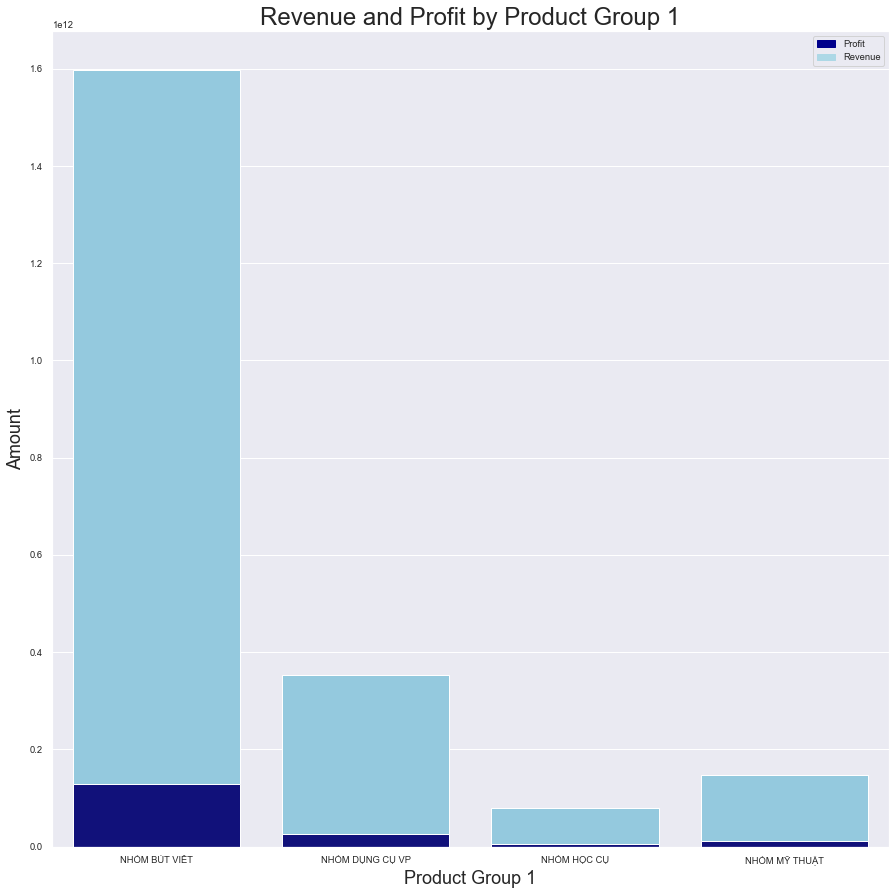

In [128]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale = 0.85)
sns.barplot(x='Product Group Name - Level 1',
            y="Group1Revenue", 
            data=Group1Revenue, 
            color = 'skyblue')
sns.barplot(x='Product Group Name - Level 1',
            y="Group1Profit", 
            data=Group1Profit, 
            color = 'darkblue')
plt.xticks(rotation=0)
plt.title("Revenue and Profit by Product Group 1", fontsize=24)
plt.xlabel('Product Group 1',fontsize=18) 
plt.ylabel('Amount',fontsize=18)
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Revenue')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

In [132]:
Group1PercentageProfit = TLGdataframe.groupby(['Product Group Name - Level 1'])\
.agg(Group1PercentageProfit = ('PercentageProfit', 'mean')).reset_index()

In [133]:
Group1PercentageProfit

,Product Group Name - Level 1,Group1PercentageProfit
0,NHÓM BÚT VIẾT,5.518548
1,NHÓM DỤNG CỤ VP,5.419513
2,NHÓM HỌC CỤ,5.839457
3,NHÓM MỸ THUẬT,5.486282


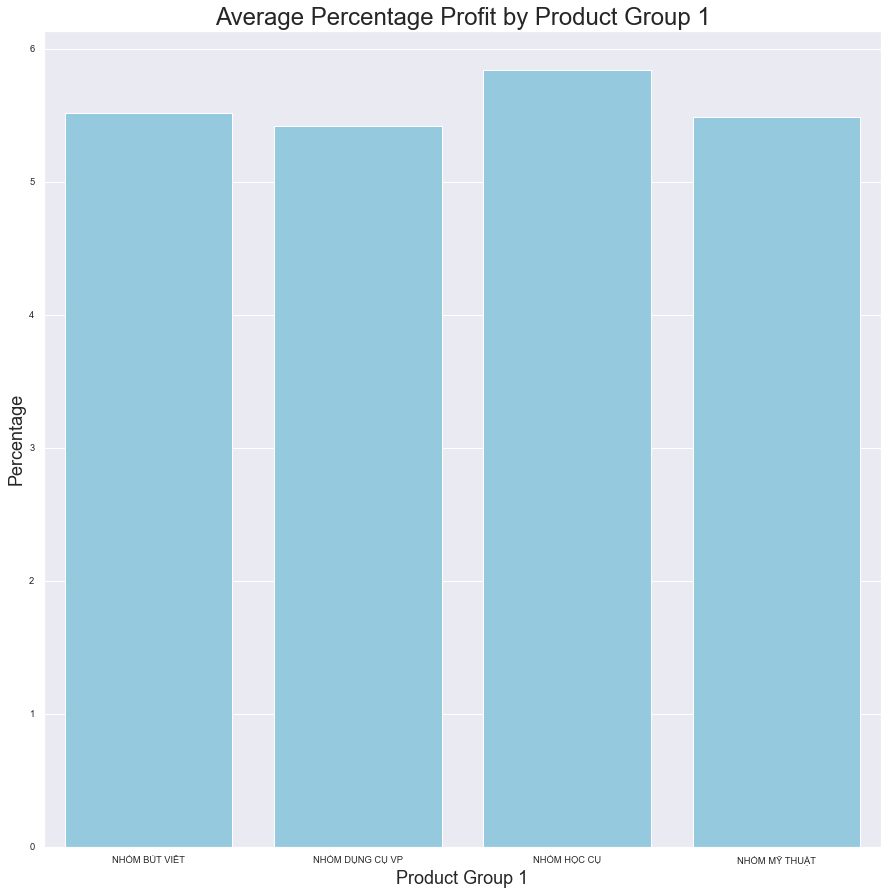

In [138]:
sns.barplot(x='Product Group Name - Level 1',
            y="Group1PercentageProfit", 
            data=Group1PercentageProfit, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Average Percentage Profit by Product Group 1", fontsize=24)
plt.xlabel('Product Group 1',fontsize=18) 
plt.ylabel('Percentage',fontsize=18)
plt.show()

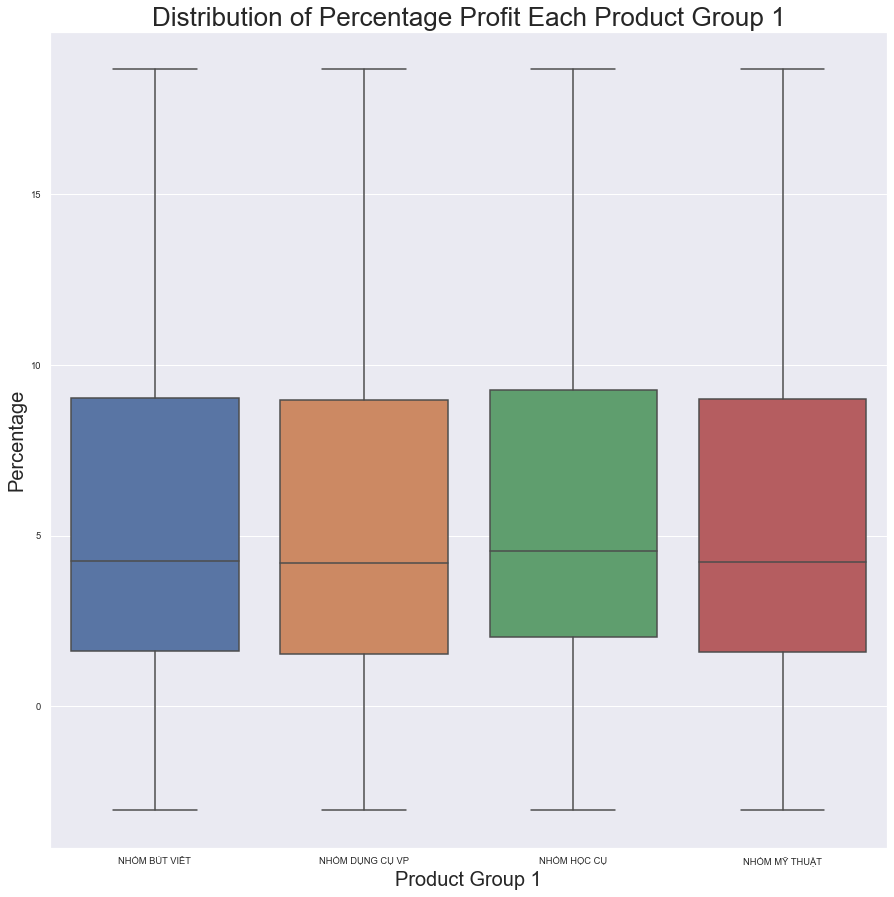

In [142]:
Group1BoxPlot = sns.boxplot(x="Product Group Name - Level 1", y="PercentageProfit", data=TLGdataframe)
Group1BoxPlot.set_xlabel("Product Group 1", fontsize=20)
Group1BoxPlot.set_ylabel("Percentage", fontsize=20)
Group1BoxPlot.axes.set_title("Distribution of Percentage Profit Each Product Group 1", fontsize=26)
plt.show()

From two plots above, in which displays the average of percentage profit of each product in the first group and the boxplot representing the distribution of the percentage, we do not really see a clear difference from these group. All the average is in the range of 5% and 6%, while these boxplots are really similar with a slightly right-skewed distribution. To test this claim, we conduct an One-Way ANOVA for comparing four means with the null hypothesis is there is no significant difference in the mean percentage among the first group and the alternative hypothesis is there exists a significant difference in the mean percentage. 

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Product Group Name - Level 1 ~ group',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)